In [1]:
from src.database.load_data import load_sql

In [6]:
df6 = load_sql("dataset_60s")
df7 = load_sql("dataset_70s")
df8 = load_sql("dataset_80s")
df9 = load_sql("dataset_90s")
df0 = load_sql("dataset_00s")
df1 = load_sql("dataset_10s")

dfs = [df6, df7, df8, df9, df0, df1]
decades = [6, 7, 8, 9, 0, 1]

In [7]:
[df.insert(loc=3, column='Decade', value=decade) for df, decade in zip(dfs, decades)]

[None, None, None, None, None, None]

In [12]:
import pandas as pd

df_merged = pd.concat(dfs, axis=0)
df_merged[:10]

,track,artist,uri,Decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
index,,,,,,,,,,,,,,,,,,,,
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,6,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,6,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,6,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,6,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,6,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0
5,Beat n. 3,Ennio Morricone,spotify:track:32VBSoD2vcoIOiPEvAfFXU,6,0.697,0.673,0,-10.573,1,0.0266,0.7140,0.919000,0.1220,0.778,112.117,167667,4,65.48604,7,0
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,6,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,0
7,Happy Days,Marv Johnson,spotify:track:0ecGwZA1ReAq4Mn3ZInaT4,6,0.720,0.624,5,-9.086,0,0.0473,0.7950,0.000000,0.4880,0.887,119.999,160040,4,30.42891,8,1
8,Carolina - Remastered 2006,Caetano Veloso,spotify:track:15gNqKkZN9Mq9AvnRqWJKb,6,0.545,0.220,2,-15.079,0,0.0828,0.5820,0.239000,0.2690,0.386,118.223,158413,4,47.08099,6,0


In [13]:
from sklearn.preprocessing import StandardScaler

x_norm = StandardScaler().fit_transform(df_merged.iloc[:, 4:].values)
x_norm[:10]

array([[-0.66917597,  0.17415497, -0.62339572,  0.46664439,  0.65926483,
        -0.374707  ,  0.33703758, -0.50618062, -0.71979257,  1.1229101 ,
         2.28120909, -0.48018427, -2.05466481, -0.37224596, -0.27928052,
         1.        ],
       [-0.21167217, -0.28126605, -0.62339572, -0.42230271,  0.65926483,
        -0.45080181, -1.05253554, -0.15349345, -0.15174876,  0.9443291 ,
        -0.60662101, -0.1485626 ,  0.25595654,  0.46984137, -0.0760854 ,
        -1.        ],
       [ 0.68639086,  0.28900027, -0.05819419, -0.59398857,  0.65926483,
        -0.40122489,  1.38510543, -0.50616605, -0.4818048 ,  1.35729765,
        -0.11969099, -0.06295158,  0.25595654, -0.14538441,  0.33030485,
        -1.        ],
       [ 0.30796178, -0.12285874,  0.50700734, -0.34422964, -1.51684112,
         0.35972317,  0.97294391, -0.42509554, -0.81765129,  1.57680346,
        -0.47606357, -0.6094737 ,  0.25595654, -0.80693432, -0.48247565,
        -1.        ],
       [-0.11565285,  0.74838147,  1

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(x_norm)

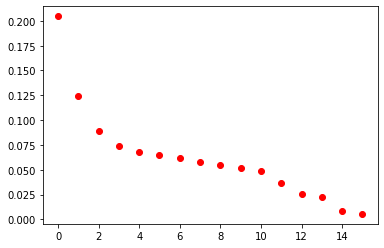

In [15]:
import matplotlib.pyplot as plt

variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

In [16]:
attributes = df_merged.columns[4:]
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(f'{attributes[i]}: {repr(pc1[i])}: {repr(pc2[i])}')

Attribute, PC1, PC2
danceability: -0.3224722309720619: -0.08852537157018499
energy: -0.438314519942093: 0.19697871764126867
key: -0.014850244951929905: 0.044642665012161964
loudness: -0.441046419248665: 0.11447614670782774
mode: -0.014021946004830546: -0.13093564612714287
speechiness: -0.08226956575261658: 0.06807126173249366
acousticness: 0.3921933714565167: -0.21971950293532067
instrumentalness: 0.30299339919710067: 0.10479700335323898
liveness: -0.043243431903105735: 0.07107895735685811
valence: -0.33068432995047903: -0.14637866216871473
tempo: -0.13828700681551126: 0.09270727724729975
duration_ms: 0.08643912127306458: 0.6454931622066704
time_signature: -0.1754011340165361: 0.061974342566685506
chorus_hit: 0.028068063501758122: 0.03787634924864657
sections: 0.09136377882511598: 0.6224341187191433
target: -0.28079561723799107: -0.11310753270972795


c:\users\xgg\pycharmprojects\spotify_analysis\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


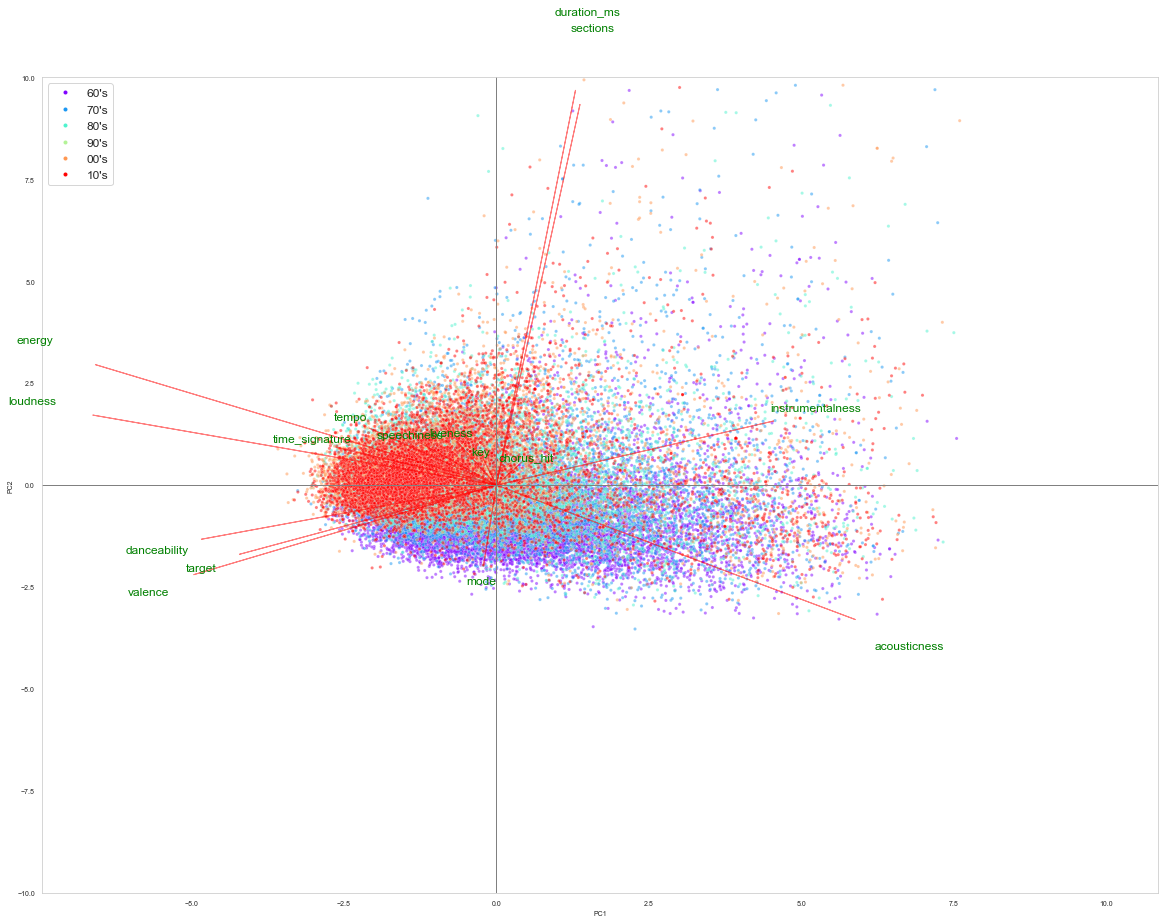

In [39]:
from matplotlib.lines import Line2D
from matplotlib import cm
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

sign = lambda x: (1, -1)[x<0]
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams.update({'font.size': 7})

fig, ax = plt.subplots()
colors = {decade: color for color, decade in zip(cm.rainbow(np.linspace(0, 1, len(decades))), decades)}
cvec = [colors[label] for label in df_merged['Decade']]

# for decade, xy in zip(df_merged['Decade'], zip(X_pca[:,0], X_pca[:,1])):
#     ax.scatter(xy[0], xy[1], s=10, color=colors[decade])

sns.scatterplot(X_pca[:,0], X_pca[:,1], s=10, c=cvec, alpha=0.5)

plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

def myplot(score,coeff,labels=None):
    scale = 15
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    for i in range(n):
        plt.arrow(0, 0, scale*coeff[i,0], scale*coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(scale * coeff[i,0] * sign(i) * 1.15, scale * coeff[i,1] * 1.15,
                     "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(scale * coeff[i,0] * sign(i) * 1.15, scale * coeff[i,1] * sign(i) * 1.2,
                     labels[i], color = 'g', ha = 'center', va = 'center')
    # plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
plt.rcParams.update({'font.size': 12})
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]), attributes)

custom = [Line2D([], [], marker='.', color=colors[color], linestyle='None') for color in colors]
plt.legend(custom, [f'{decade}0\'s' for decade in decades], loc='upper left')
plt.show()